## Подготовка среды

In [1]:
%pip install python-gdcm
%pip install pydicom
%pip install numpy
%pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 43.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import os
import re
import shutil as sh
import zipfile as zf
import matplotlib.pyplot as plt
import numpy as np
# import pythonwin
import pydicom as dicom

In [22]:
from google.colab import drive
drive.mount('data')

Mounted at data


## Чтение и распаковка данных

In [23]:
DATASET_PATH = '/content/data/MyDrive/Segmentation/Dataset'

## Функции для работы с файлами

In [45]:
def get_flat_filename_list(path, dirtype, extention):
  filelist = []
  items = [item for item in sorted(os.listdir(path))]
  for item in items:
    if os.path.isdir(f'{path}/{item}'):
      filelist += get_flat_filename_list(f'{path}/{item}', dirtype, extention)
    else:
      if path.endswith(dirtype) and item.endswith(extention): 
        filelist.append(f'{path}/{item}')
  return filelist

In [135]:
sgm_files = get_flat_filename_list(f'{DATASET_PATH}/LUNG1-002', 'Segmentation', '.dcm')
print(len(sgm_files))
for f in sgm_files[:4]: print(f)
for f in sgm_files[-4:]: print(f)

1
/content/data/MyDrive/Segmentation/Dataset/LUNG1-002/Segmentation/1-1.dcm
/content/data/MyDrive/Segmentation/Dataset/LUNG1-002/Segmentation/1-1.dcm


In [136]:
src_files = get_flat_filename_list(f'{DATASET_PATH}/LUNG1-002', 'Source', '.dcm')
print(len(src_files))
for f in src_files[:4]: print(f)
for f in src_files[-4:]: print(f)

111
/content/data/MyDrive/Segmentation/Dataset/LUNG1-002/Source/1-001.dcm
/content/data/MyDrive/Segmentation/Dataset/LUNG1-002/Source/1-002.dcm
/content/data/MyDrive/Segmentation/Dataset/LUNG1-002/Source/1-003.dcm
/content/data/MyDrive/Segmentation/Dataset/LUNG1-002/Source/1-004.dcm
/content/data/MyDrive/Segmentation/Dataset/LUNG1-002/Source/1-108.dcm
/content/data/MyDrive/Segmentation/Dataset/LUNG1-002/Source/1-109.dcm
/content/data/MyDrive/Segmentation/Dataset/LUNG1-002/Source/1-110.dcm
/content/data/MyDrive/Segmentation/Dataset/LUNG1-002/Source/1-111.dcm


In [137]:
thr_files = get_flat_filename_list(f'{DATASET_PATH}/LUNG1-002', 'Throwble', '.dcm')
print(len(thr_files))
for f in thr_files[:4]: print(f)
for f in thr_files[-4:]: print(f)

1
/content/data/MyDrive/Segmentation/Dataset/LUNG1-002/Throwble/1-1.dcm
/content/data/MyDrive/Segmentation/Dataset/LUNG1-002/Throwble/1-1.dcm


## Функции для отрисовки изображений

In [27]:
def draw_ds(ds):
  data = ds.pixel_array
  print(data.shape)
  plt.figure(1, figsize=(16, 10))
  plt.subplot(1, 3, 1)
  plt.title('Оригинальное изображение', fontweight='bold')
  plt.imshow(data, cmap='gray')
  plt.axis('off')

  plt.show()

In [126]:
def draw3D_ds(path):
  ITEM_PER_ROW = 10
  ds = dicom.dcmread(path)
  data = ds.pixel_array
  print(data.shape[0])
  rows, cols = data.shape[0]//ITEM_PER_ROW+1, ITEM_PER_ROW
  fig, ax = plt.subplots(rows, cols, figsize=(10, rows))
  for i in range(rows):
    for j in range(cols):
      AX = ax[i, j]
      AX.axis('off')
      if i*ITEM_PER_ROW+j<data.shape[0]:
        AX.imshow(data[i*ITEM_PER_ROW+j], cmap='gray')
  plt.show()

In [125]:
def draw_array(arr):
  print(len(arr))
  ITEM_PER_ROW = 10
  rows, cols = len(arr)//ITEM_PER_ROW+1, ITEM_PER_ROW
  fig, ax = plt.subplots(rows, cols, figsize=(10, rows))
  for i in range(rows):
    for j in range(cols):
      AX = ax[i, j]
      AX.axis('off')
      if i*ITEM_PER_ROW+j<len(arr):
        item = arr[i*ITEM_PER_ROW+j]
        ds = dicom.dcmread(item)
        data = ds.pixel_array
        AX.imshow(data, cmap='gray')
  plt.axis('off')
  plt.show()

## Просмотр изображений

### Отрисовка исходных файлов

111


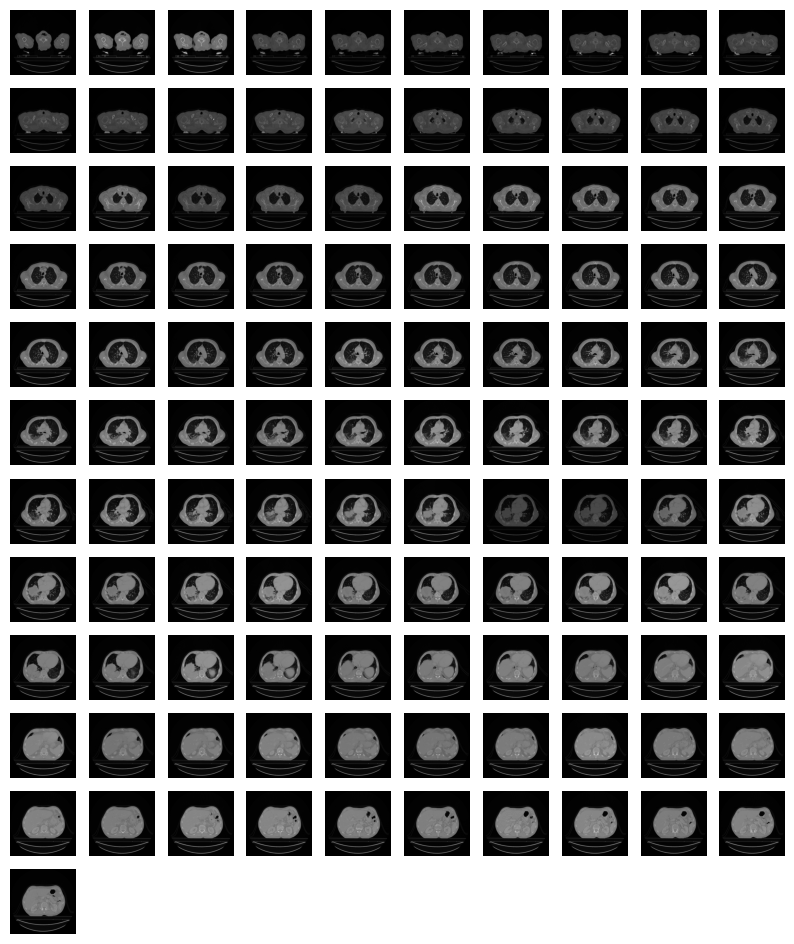

In [138]:
# Рисуем срезы исходных данных
draw_array(src_files)

### Отрисовка сегментированных изображений

666


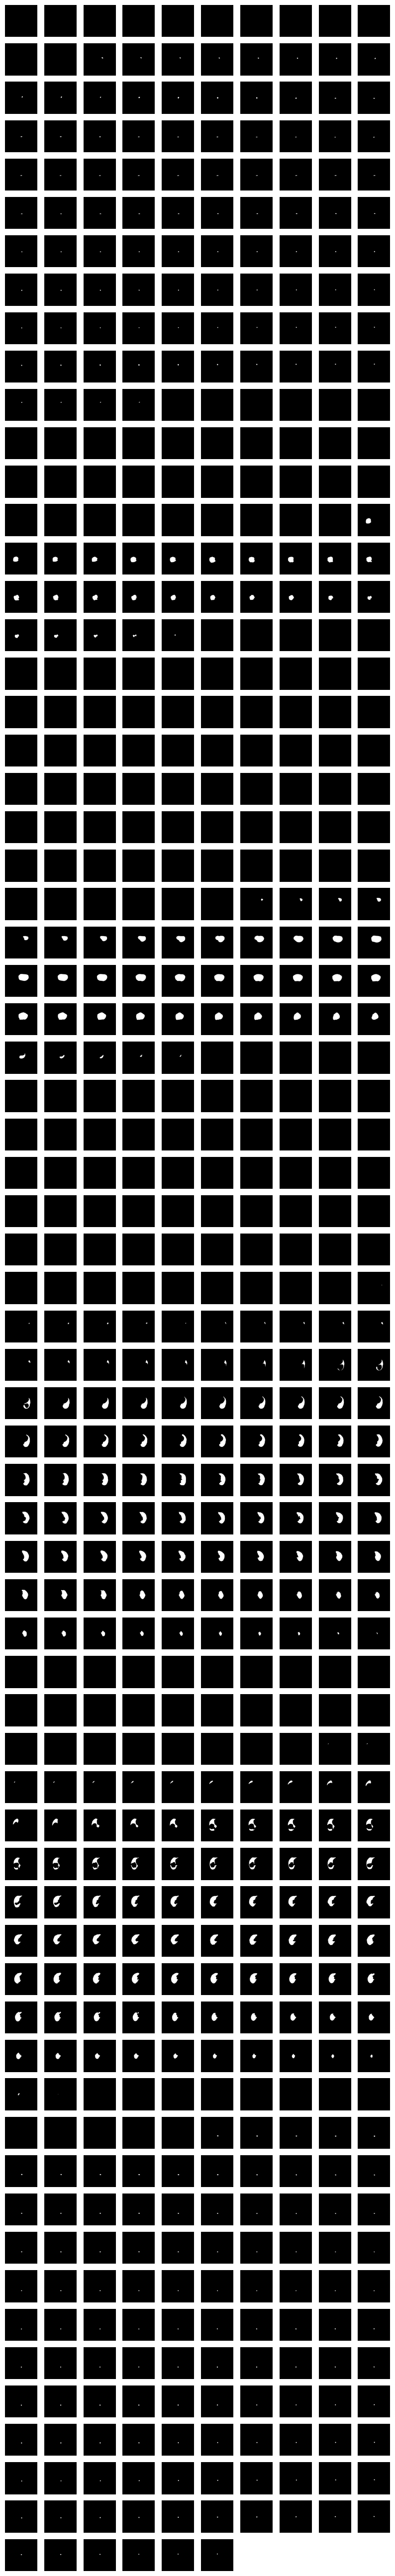

In [139]:
draw3D_ds(sgm_files[0])

### Просмотр служебной информации

In [140]:
ds = dicom.dcmread(thr_files[0])
print(type(ds))
print(ds)

<class 'pydicom.dataset.FileDataset'>
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: RT Structure Set Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.32722.99.99.176299286985297380474523377188427934842
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0012) Instance Creation Date              DA: '20190225'
(0008, 0013) Instance Creation Time              TM: '113441'
(0008, 0016) SOP Class UID                       UI: RT Structure Set Storage

## Отчет по исследованию данных
* В папках Source лежат исходные файлы сканирования

* В паках Segmentation лежит файл, который содержит сегментированные изображения. Количество срезов кратно иходным файлам.

* В папках Throwble лежит файл со служебной информацией, которая для обучения не важна.

Дальнейший план:
1. Произвести дублирование исходных файлов в соответствии с сегментацией
2. Перевести данные из файла сегментации в отдельные файлы
3. Убрать из списков Source и Segmentation файлов все файлы, где сегментация не имеет выпотов
4. Создать генератор, который будет 